**Mobile price Classification with ANN**





In [1]:
#Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv('/content/mobile_price_classification.csv')

In [3]:
data.head(5)

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.shape


(2000, 21)

In [5]:
data['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [7]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
X = data[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam','4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera','px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g','touch_screen', 'wifi']]
y = data['price_range']

In [9]:
# One-hot encode the labels
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Modelling-ANN

In [10]:
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Softmax = multi-class classifier

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=8,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.2786 - loss: 1.3887 - val_accuracy: 0.4250 - val_loss: 1.2488
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5082 - loss: 1.1738 - val_accuracy: 0.5500 - val_loss: 0.9564
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6179 - loss: 0.8695 - val_accuracy: 0.7063 - val_loss: 0.7019
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7715 - loss: 0.6118 - val_accuracy: 0.7969 - val_loss: 0.5234
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8261 - loss: 0.4707 - val_accuracy: 0.8344 - val_loss: 0.4222
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8527 - loss: 0.3692 - val_accuracy: 0.8656 - val_loss: 0.3484
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8820 - loss: 0.3084 - val_accuracy: 0.8844 - val_loss: 0.3021
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9221 - loss: 0.2432 - val_accuracy: 

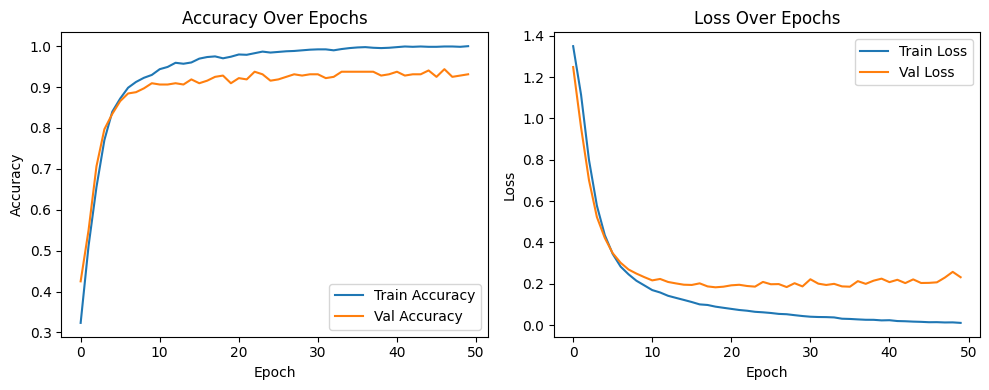

In [11]:
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9266 - loss: 0.2492  
Test Accuracy: 0.92
Test Loss: 0.30


#Hyperparameter Tuning

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


def train_model_with_optimizer():
    model = Sequential()
    model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

    return history

history = train_model_with_optimizer()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2756 - loss: 1.3849 - val_accuracy: 0.2531 - val_loss: 1.3577
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3438 - loss: 1.3188 - val_accuracy: 0.3531 - val_loss: 1.3148
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4006 - loss: 1.2684 - val_accuracy: 0.3969 - val_loss: 1.2566
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4619 - loss: 1.1821 - val_accuracy: 0.4531 - val_loss: 1.1529
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5249 - loss: 1.0485 - val_accuracy: 0.5188 - val_loss: 1.0122
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5822 - loss: 0.9269 - val_accuracy: 0.5969 - val_loss: 0.8658
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6580 - loss: 0.7789 - val_accuracy: 0.6719 - val_loss: 0.7458
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7349 - loss: 0.6441 - val_accuracy: 0.7375 - val_loss: 0.6485
Epo

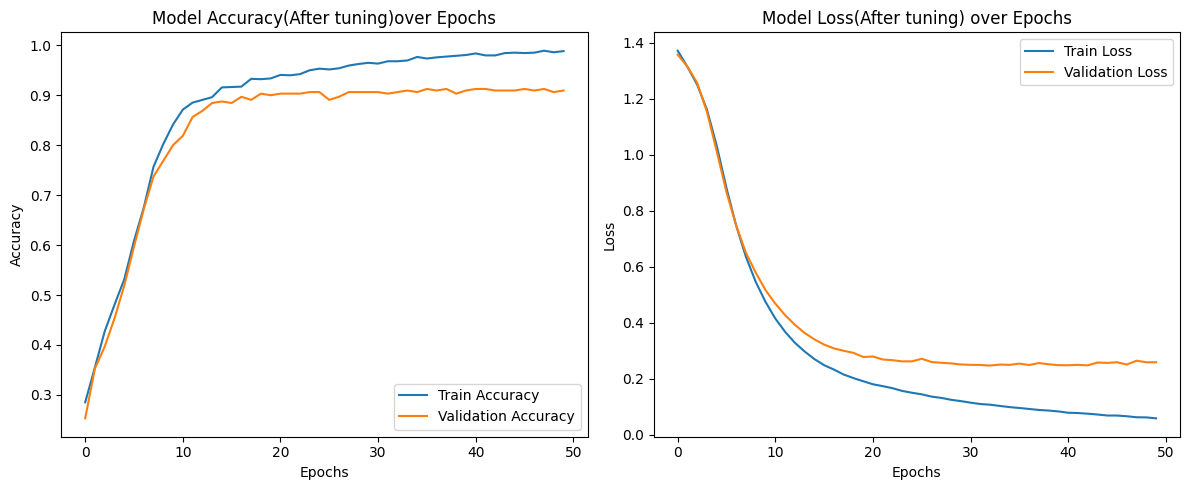

In [14]:
# Plotting training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy(After tuning)over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss(After tuning) over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
# Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9266 - loss: 0.2492 
Test Accuracy: 0.92
Test Loss: 0.30


Mobile Price Classification using ANN,we support Bob, a new mobile company owner, in estimating the price range of mobile phones based on their features using an Artificial Neural Network. The dataset mobile_price_classification.csv was used, with price_range as the target variable and the remaining columns as input features. After preprocessing the data using standard scaling, an ANN was built and trained using the Adam optimizer with a learning rate of 0.001, batch size of 32, and 50 epochs. The model achieved a test accuracy of 92% even before hyperparameter tuning, and tuning did not significantly change the results. This shows that the initial model was already well-optimized and reliable for price classification.